# GRIP @ THE SPARKS FOUNDATION
DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP (AUG21)

Author : Ashish Negi

# Task 3: Exploratory Data Analysis - Retail (Level - Beginner)
Performing ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.And on the behalf of a business manager, we will try to find out the weak areas where we can work to make more profit using the dataset 'SampleSuperstore'.

# Step 1 : Importing all the required libraries

In [1]:
#importing libraries that we will be using
import numpy as np
import pandas as pd
import seaborn as sns #Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python.
import matplotlib.pyplot as plt

Data can be found at https://bit.ly/3i4rbWl

## Reading the Dataset

In [2]:
#fetching the data from the computer
data = pd.read_csv('C:/Users/User/Desktop/Priority/The Sparks Foundation/Task 3/SampleSuperstore.csv')
data.head() #used to get the first n rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Understanding Data

In [3]:
data.describe() # used to print a concise summary of a Data Frame

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


This function only shows the continous variables. We can observe from this:
1. In sales and profit, the difference between max value and 75% is quite high which indicates outliers in the dataset.

In [4]:
data.describe(include='all') #used to view some basic statistical details like percentile, mean, std etc.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


Following conclusion can be made for categorical variables:
1. There are only 4 types of shipping mode we will examine.
2. This dataset is given for 3 segments of people.

In [48]:
#Checking the data types
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

We can conclude all the data types are correct and no changes required. 

## Cleaning the data

In [5]:
data.isnull().sum() # Check if there is any null value in the Dataset

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### No missing data

In [6]:
dup = data.duplicated()
print(dup.sum())
data[dup]

17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [7]:
#Removing duplicate data
data.drop_duplicates(inplace=True)
dup1=data.duplicated()
dup1.sum()

0

## Step 2 : Univariate Analysis on Data


In [8]:
# Analysing segment of people buying from the supermart
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [9]:
data['Segment'].value_counts()/len(data['Segment'])*100

Consumer       51.949484
Corporate      30.219505
Home Office    17.831011
Name: Segment, dtype: float64

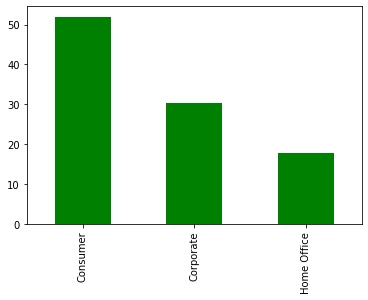

In [10]:
S = (data['Segment'].value_counts()/len(data['Segment'])*100).plot(kind='bar',color='g')

Following conclusions be made from the graph:
1. 50% of people belongs to consumer class.
2. (20-30)% of the people belongs to Corporate and Home offices.

In [11]:
#Analysing Ship mode for the supermart
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [12]:
M = (data['Ship Mode'].value_counts())/len(data['Ship Mode'])*100
M

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

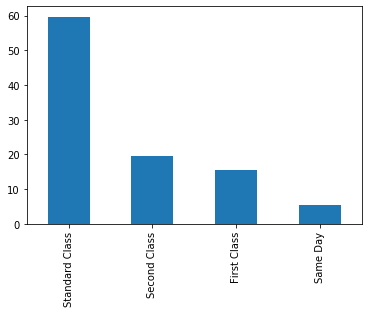

In [13]:
M.plot(kind='bar')

Conclusions from the graph:
1. Most of the deliveries belong to the Standard Class(Around 60%).
2. Very less % of deliveries were made on the same day.
3. (10-20)% of deliveries belong to First and Second class.

In [14]:
# Analysing Category of items in the supermart
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

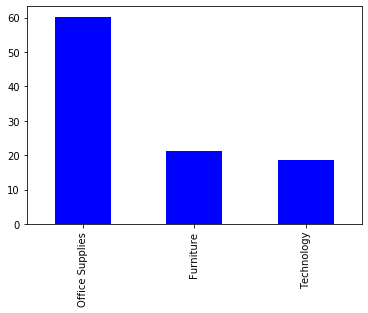

In [15]:
C= (data['Category'].value_counts())/len(data['Category'])*100
C.plot(kind='bar',color='b')

Conclusions from the above graph:
1. Most of the categories belong to Office Supplies in supermart.
2. Around 20% belong to furniture and technology.

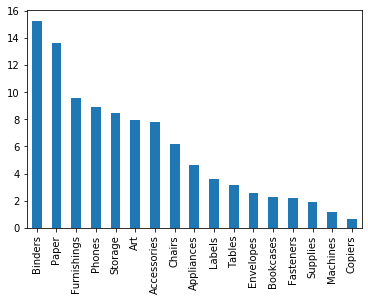

In [16]:
#Analysing Sub-Category of items in the supermart
((data['Sub-Category'].value_counts())/len(data['Sub-Category'])*100).plot(kind='bar')

From the graph we can conclude:
    1. (9-15)% Sub-Category fails under office supplies.
    2. (2-8)% Sub-Category belongs to Technology and Furniture.

## Bivariate Analysis

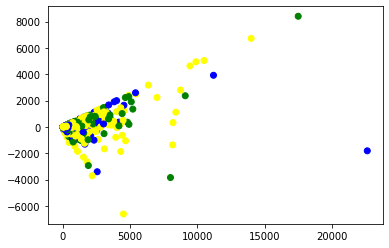

In [17]:
fig, ax = plt.subplots()
colors = {'Consumer':'yellow','Corporate':'green','Home Office':'blue'}
ax.scatter(data['Sales'],data['Profit'],c=data['Segment'].apply(lambda x: colors[x]))
plt.show()

From the above plot, we can say that there is more profit in consumer segment.

In [18]:
data.pivot_table(values='Sales',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.98,365.598,307.666,51.764,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,59.10,245.646,480.165,52.272,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.312
Home Office,49.90,191.646,411.332,52.716,366.744,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [19]:
data.pivot_table(values='Profit',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.14600,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.35285,46.7908,26.27735,6.7068,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.7130
Home Office,15.45460,37.2300,16.79860,7.2576,-18.2220,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


From the above pivot_table we can conclude:
    1. For Discount more than 30%, the superstore was going on loss
    2. For items having Discount between (0-20)%, the sales of superstore was average and was gaining profit to some extent as depicted in the pivot table.

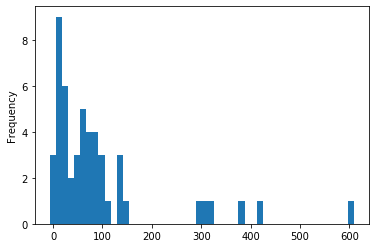

In [20]:
temp_data = data.loc[(data['Segment']=='Consumer')&(data['Discount']==0.1)]
temp_data['Profit'].plot.hist(bins=50)

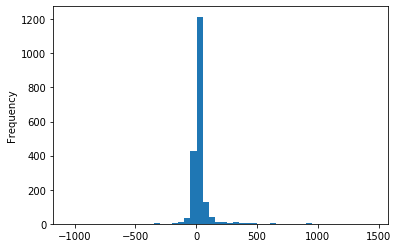

In [21]:
temp_data = data.loc[(data['Segment']=='Consumer')&(data['Discount']==0.2)]
temp_data['Profit'].plot.hist(bins=50)

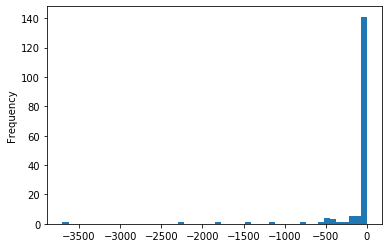

In [22]:
temp_data = data.loc[(data['Segment']=='Consumer')&(data['Discount']==0.8)]
temp_data['Profit'].plot.hist(bins=50)

For all the segments, when superstore is offering discount less than 40%, it's going on Profit as depicted by above Graph.
While if Discount>50% like above we have taken Discount=80%, superstore is going on loss.

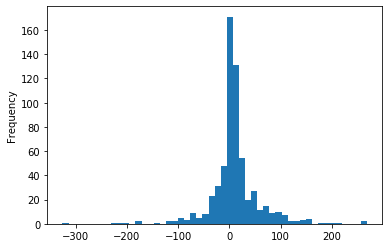

In [23]:
temp_data = data.loc[(data['Category']=='Furniture')&(data['Discount']==0.2)]
temp_data['Profit'].plot.hist(bins=50)

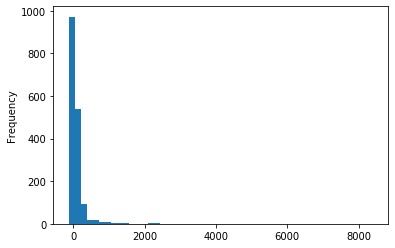

In [24]:
temp_data = data.loc[(data['Category']=='Technology')&(data['Discount']<=0.3)]
temp_data['Profit'].plot.hist(bins=50)

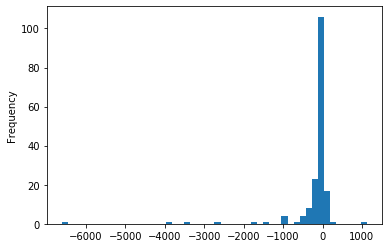

In [25]:
temp_data = data.loc[(data['Category']=='Technology')&(data['Discount']>=0.3)]
temp_data['Profit'].plot.hist(bins=50)

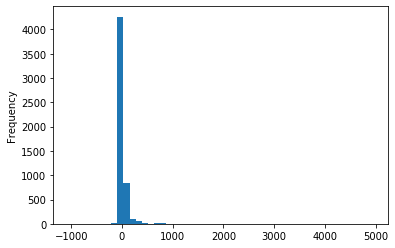

In [26]:
temp_data = data.loc[(data['Category']=='Office Supplies')&(data['Discount']<=0.3)]
temp_data['Profit'].plot.hist(bins=50)

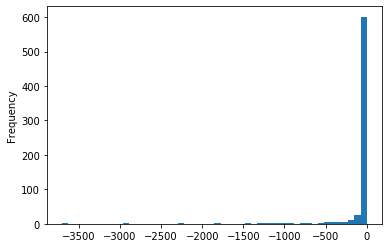

In [27]:
temp_data = data.loc[(data['Category']=='Office Supplies')&(data['Discount']>=0.3)]
temp_data['Profit'].plot.hist(bins=50)

From the above graphs, we can conclude for all the categories, Office Supplies, Technology and Furniture:
1. When Discount<=30% in items, Sales was going into profit.
2. When Discount>=30% in items, Superstore is experiencing a huge loss.

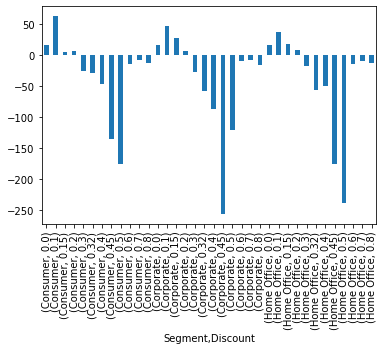

In [28]:
temp = data.groupby(['Segment','Discount']).Profit.median()
temp.plot(kind='bar',stacked=True)

### Conclusion: This shows the exact scenario of Profit of all the Segments when following Discount was offered by superstore.